# Avaliação de Pneumonia em imagens de Raio-X
- NORMAL
- PNEUMONIA

https://www.kaggle.com/code/amyjang/tensorflow-pneumonia-classification-on-x-rays


### Carregando os dados

In [2]:
from fastai.vision.all import *
import numpy as np

seed = 53
np.random.seed(seed)
dls = ImageDataLoaders.from_folder('dataset',train='train', valid_pct=0.2, seed=seed, item_tfms=Resize(224))
dls.vocab


['NORMAL', 'PNEUMONIA']

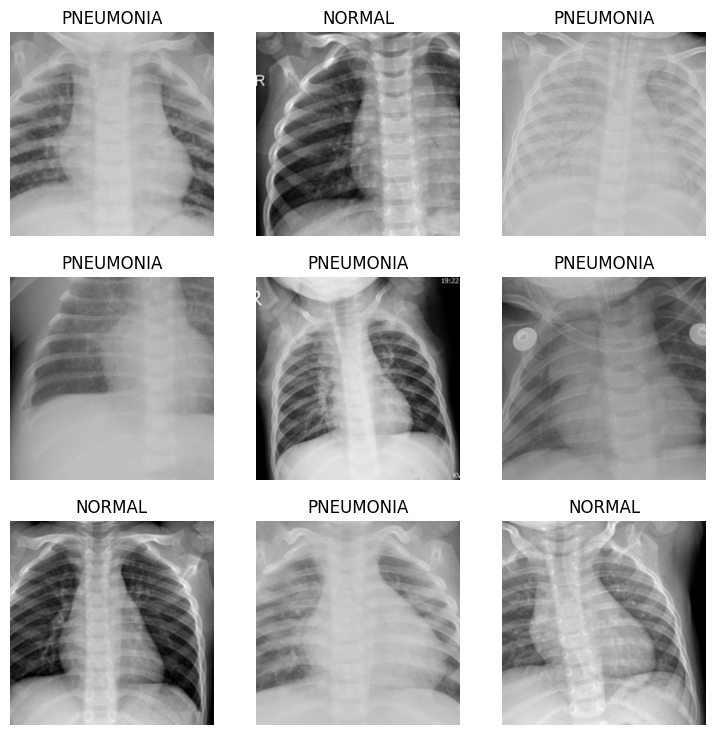

In [3]:
dls.show_batch()

In [4]:
len(dls.train_ds),len(dls.valid_ds)

(4685, 1171)

### Instanciando e treinando o modelo

In [5]:
learn = vision_learner(dls, models.resnet34, metrics=error_rate)

c:\Users\hugog\GitHub\SENAI_minicurso\env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hugog\GitHub\SENAI_minicurso\env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
#learn.fit_one_cycle(10)
#learn.fine_tune(1)
#learn.save('stage1')

epoch,train_loss,valid_loss,error_rate,time
0,0.448733,0.276880,0.081127,08:04


epoch,train_loss,valid_loss,error_rate,time
0,0.184425,0.125992,0.034159,08:35


In [ ]:
learn.load('stage1')

### Interpretando o modelo

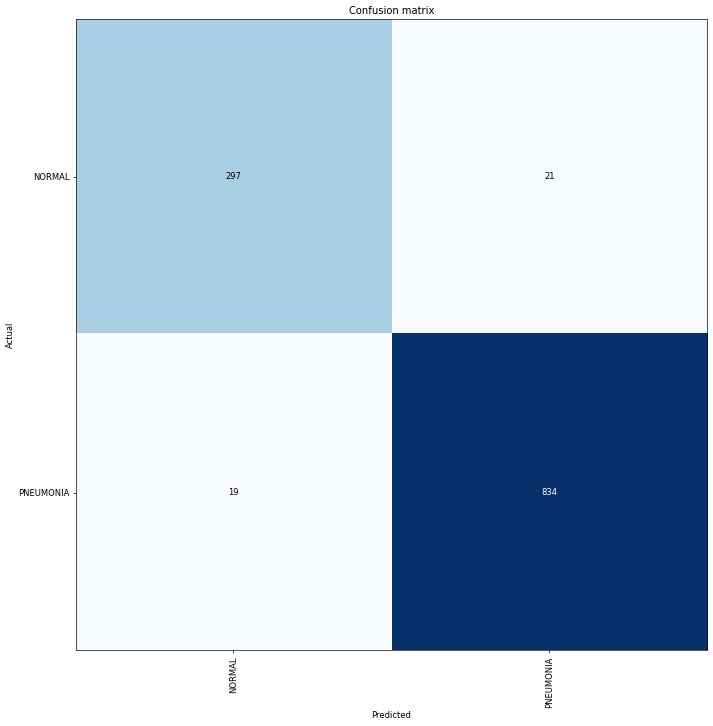

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

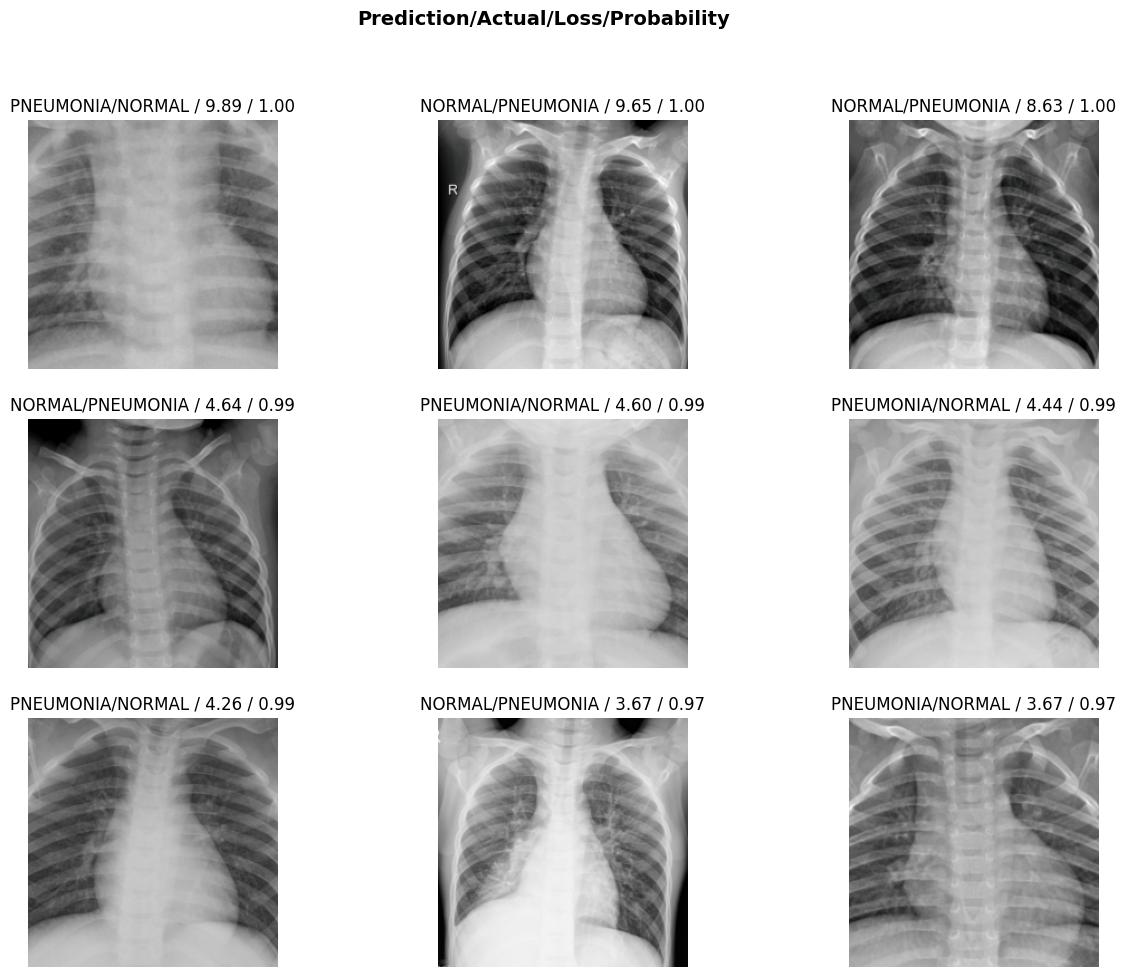

In [9]:
interp.plot_top_losses(9, figsize=(15,11)) #,heatmat=True

# Realizando predições com o modelo treinado

In [10]:
from PIL import Image
import random

CLASSE DE TESTE: PNEUMONIA
IMAGE DE TESTE : person127_bacteria_602.jpeg


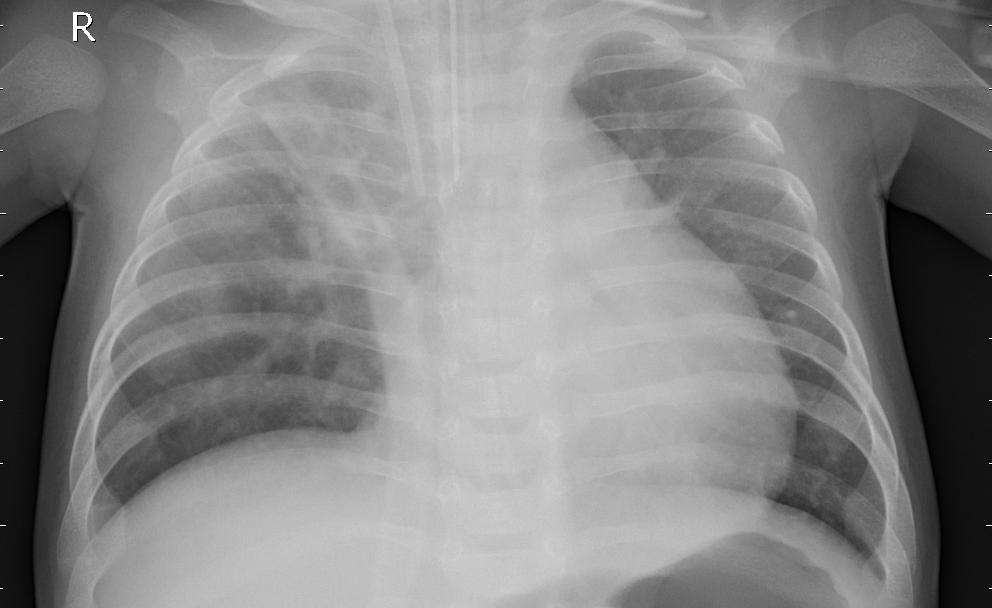

In [13]:
## Open Image
test_class = random.choice(dls.vocab)
print(f"CLASSE DE TESTE: {test_class}")
test_image = random.choice(os.listdir(os.path.join('dataset','test',test_class)))
print(f"IMAGE DE TESTE : {test_image}")

image_path = os.path.join('dataset','test',test_class,test_image)
image = Image.open(image_path).convert('RGB')
image

Probabilities: 
	NORMAL: 1.03 %
	PNEUMONIA: 98.97 %

Prediction: PNEUMONIA


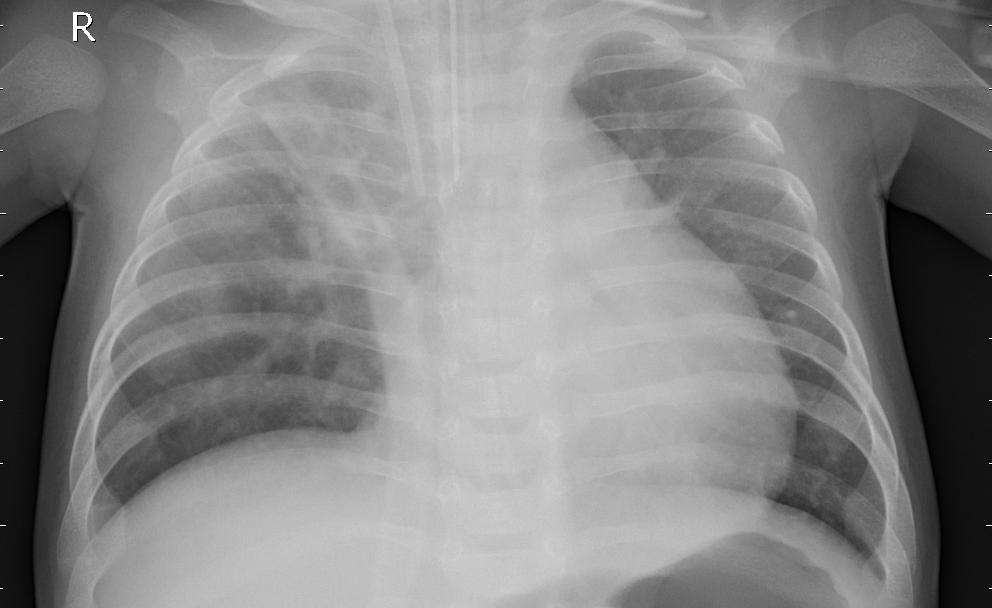

In [24]:
# predict image with learn
pred,pred_idx,probs = learn.predict(image)
print("Probabilities: ")
for i in range(len(dls.vocab)):
    print(f"\t{dls.vocab[i]}: {probs[i].item()*100:.02f} %")

print(f"\nPrediction: {pred.upper()}")
image
